#코드



-- 농어의 길이를 알려주시면 무게를 예측해드립니다. --

농어의 길이 : 50
50.0cm 농어의 무게 예측: 1573.9842352827402
결정계수 점수 (훈): 0.9706807451768623
결정계수 점수 (테): 0.9775935108325122


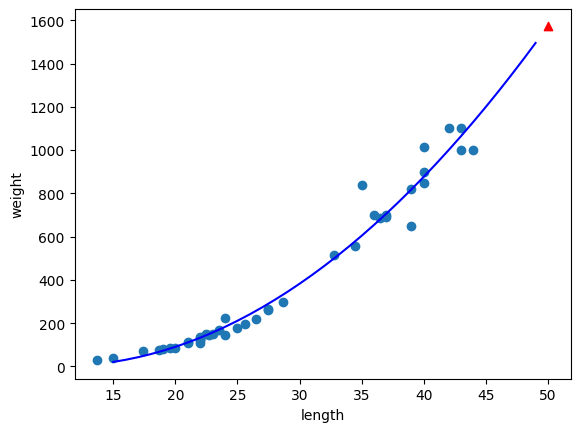

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 데이터 준비
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

# 데이터를 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# 다항 회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

# 선형 회귀 모델 훈련
lr = LinearRegression()
lr.fit(train_poly, train_target)

# 예측을 위한 길이 입력 받기
print("\n-- 농어의 길이를 알려주시면 무게를 예측해드립니다. --\n")
input_l = float(input("농어의 길이 : "))

# 예측 시, 입력값에 대해 다항 특성 변환을 적용
input_poly = np.array([[input_l ** 2, input_l]])

# 예측 결과 출력
result = lr.predict(input_poly)
print(f"{input_l}cm 농어의 무게 예측:", result[0])

# 훈련 세트와 테스트 세트의 결정계수 점수 평가
print("결정계수 점수 (훈):", lr.score(train_poly, train_target))
print("결정계수 점수 (테):", lr.score(test_poly, test_target))

# 시각화
plt.scatter(train_input, train_target)
plt.scatter(input_l, result, marker='^', color='r')  # 예측된 지점 표시
point = np.arange(15, 50)  # 농어의 길이를 임의로 15부터 50까지 그려보자.
plt.plot(point, lr.coef_[0] * point**2 + lr.coef_[1] * point + lr.intercept_, color='blue')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 책과 동일하게 50으로 예측해보자. 1573의 결과가 나올 것이다.
